In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('forth_trace.csv')
X = df.drop(columns=['class'])
y = df['class']

In [3]:
na = df.isna().any()
na[na == True]

Series([], dtype: bool)

## Distribuição de classes

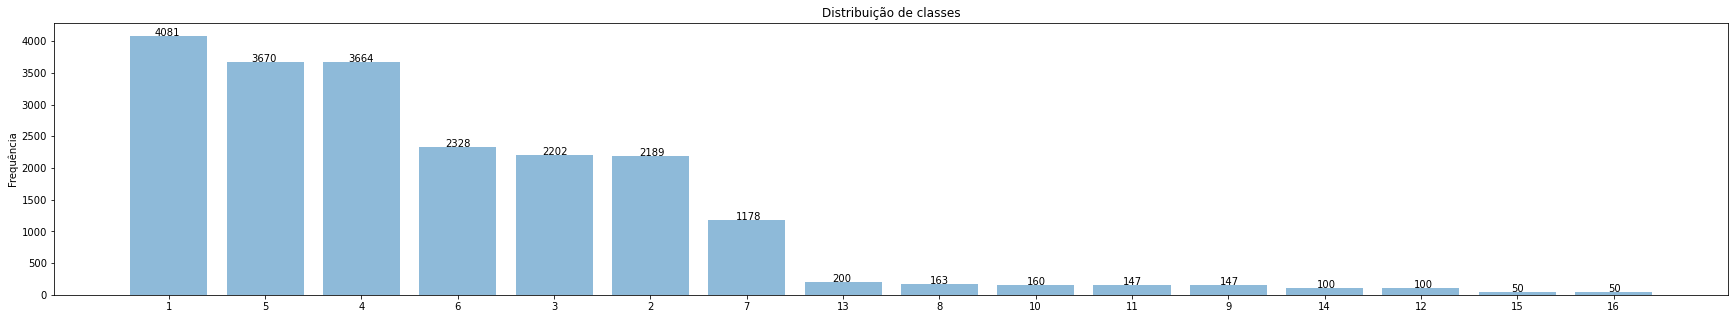

In [18]:
counts = y.value_counts()
bar_y = counts.index.to_list()
bar_x = counts.tolist()
y_pos = np.arange(len(bar_y))

plt.subplots(figsize=(30,5))
plt.bar(y_pos, bar_x, align='center', alpha = 0.5)
plt.xticks(y_pos, bar_y)
xlocs, xlabs = plt.xticks()
plt.ylabel('Frequência')
plt.title('Distribuição de classes')
for i, v in enumerate(bar_x):
    plt.text(xlocs[i] - 0.15 + i*0.006, v + 5, str(v))

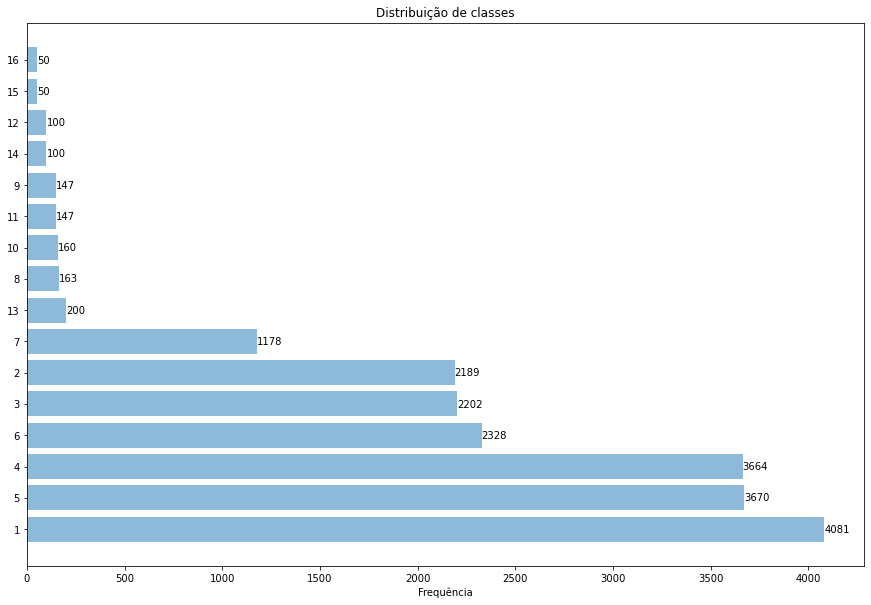

In [45]:
counts = y.value_counts()
bar_y = counts.index.to_list()
bar_x = counts.tolist()
y_pos = np.arange(len(bar_y))

plt.subplots(figsize=(15,10))
plt.barh(y_pos, bar_x, align='center', alpha = 0.5)
plt.yticks(y_pos, bar_y)
ylocs, ylabs = plt.yticks()
plt.xlabel('Frequência')
plt.title('Distribuição de classes')
for i, v in enumerate(bar_x):
    plt.text(v, i - .1, str(v))

## Scatter plot

In [ ]:
# Pre-Process data

tsne_data = X.copy()
label = y.copy()

# Scale data so it has mean = 0, std = 1
scl = StandardScaler()
# and scale every entry to [0,1] range
tsne_data = scl.fit_transform(tsne_data)
# so that the sparse data is centered

# Reduce dimensions (speed up)
# uses SVD (Singular Value Decomposition)
# to linear dimensionality reduction (projection)
# requires not sparsed data
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
# t-distributed stochastic neighbor embedding
# nonlinear dimensionality reduction to high dim data
# for visulation on low dim spaces
tsne = TSNE(random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(tsne_data)

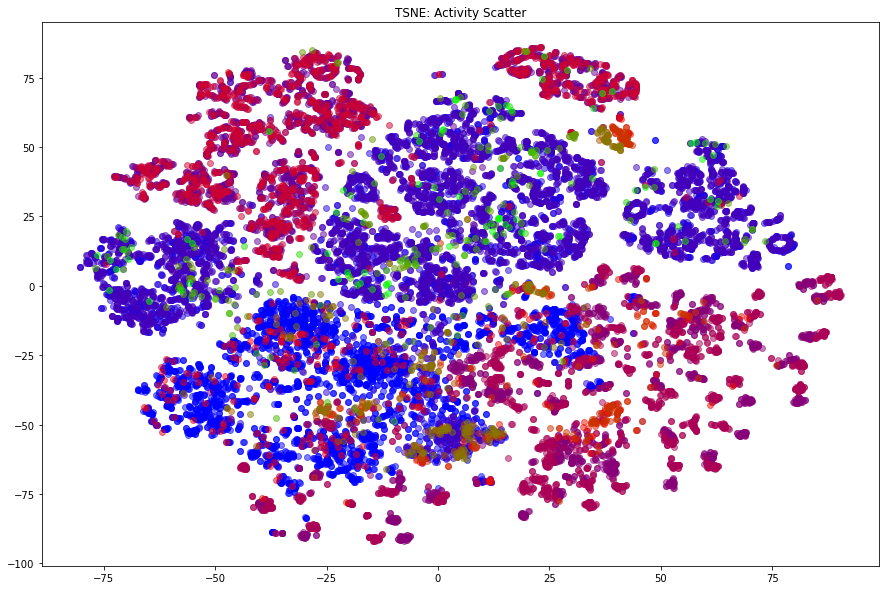

In [ ]:
## Plot Activities

# Create subplots
plt.subplots(figsize=(15,10))

# Get colors
n = label.unique().shape[0]
colormap = get_cmap('brg')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label.value_counts().index):
    # Mask to separate sets
    mask = (label==group).values
    # ax[0]
    plt.scatter(
        x=tsne_transformed[mask][:,0],
        y=tsne_transformed[mask][:,1],
        c=colors[i],
        alpha=0.5,
        label=group
    )
plt.title('TSNE: Activity Scatter')
plt.show()

## Correlation

In [ ]:
corr = df.corr(method='spearman')
corr_target = abs(corr['class'])
filtered = corr_target[corr_target > 0.8]
print(filtered)

class    1.0
Name: class, dtype: float64
